In [1]:
# EDA 사전 세팅
%matplotlib inline

import time
import os
os.environ['KMP_WARNINGS'] = 'off'
from functools import reduce
import matplotlib as mpl
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) ## 모든 열을 출력한다.
import seaborn as sns  #데이터 시각화 
sns.set(font="AppleGothic", 

        rc={"axes.unicode_minus":False},
        
        style='darkgrid')

In [35]:
df = pd.read_csv('/Users/choejeehyuk/DNA/🚲UOS 빅데이터 알고리즘 경진대회/train.csv')

In [36]:
train = df.copy()

In [37]:
train['일시'] = train['일시'].astype(str)
train['일시'] = pd.to_datetime(train['일시'])
train['year'] = train.일시.dt.year
train['month'] = train.일시.dt.month
train['day'] = train.일시.dt.day
train['weekday'] = train.일시.dt.weekday
# train.drop(['일시'], axis=1, inplace = True)
train.head(110)

,일시,광진구,동대문구,성동구,중랑구,year,month,day,weekday
0,2018-01-01,0.592,0.368,0.580,0.162,2018,1,1,0
1,2018-01-02,0.840,0.614,1.034,0.260,2018,1,2,1
2,2018-01-03,0.828,0.576,0.952,0.288,2018,1,3,2
3,2018-01-04,0.792,0.542,0.914,0.292,2018,1,4,3
4,2018-01-05,0.818,0.602,0.994,0.308,2018,1,5,4
...,...,...,...,...,...,...,...,...,...
105,2018-04-16,3.718,2.156,3.822,1.320,2018,4,16,0
106,2018-04-17,3.702,2.264,3.546,1.402,2018,4,17,1
107,2018-04-18,3.134,1.980,3.042,1.138,2018,4,18,2
108,2018-04-19,2.734,1.472,2.564,0.974,2018,4,19,3


/Users/choejeehyuk/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


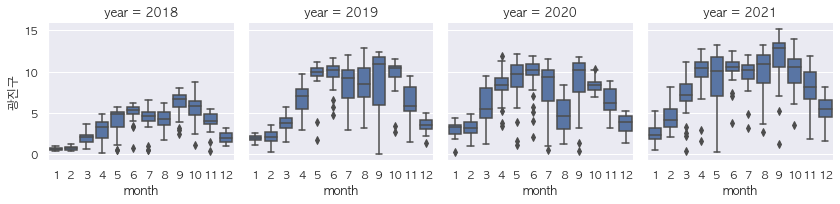

/Users/choejeehyuk/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


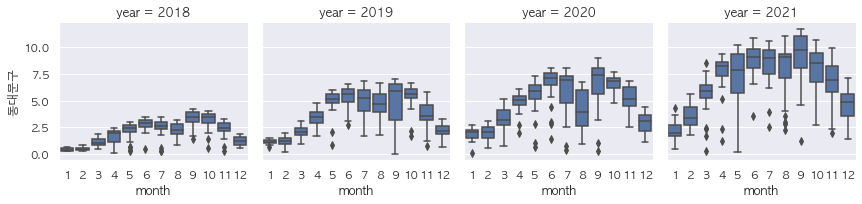

/Users/choejeehyuk/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


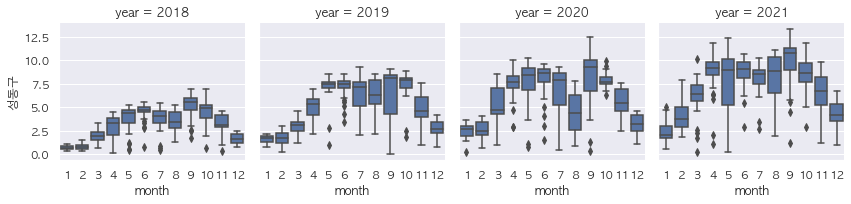

/Users/choejeehyuk/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


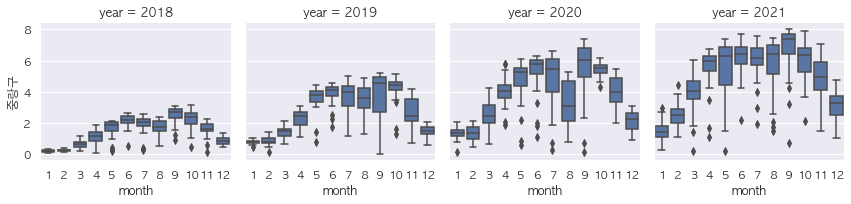

In [9]:
column = ['광진구', '동대문구', '성동구', '중랑구']
def get_boxplot_m(df, column):   
    
    # create a facet grid
    g = sns.FacetGrid(df, col="year", col_wrap=4, height=3)

    # plot the boxplot for each year and month
    g.map(sns.boxplot, "month", column)

    # show the plot
    plt.show()

for i in column:
    get_boxplot_m(train, i)

In [10]:
def get_view_df(df, target, order):
    viewd = df[['일시', target]]
    viewd = viewd.reset_index(drop=True)
    viewd = viewd.reset_index()
    print(target)
    fig, ax = plt.subplots()
    fig.set_size_inches(30, 10)
    sns.regplot(x='index',y=target, data=viewd, color = 'dodgerblue', line_kws={'color':"red"},order=order, ax=ax)
    plt.show()

광진구


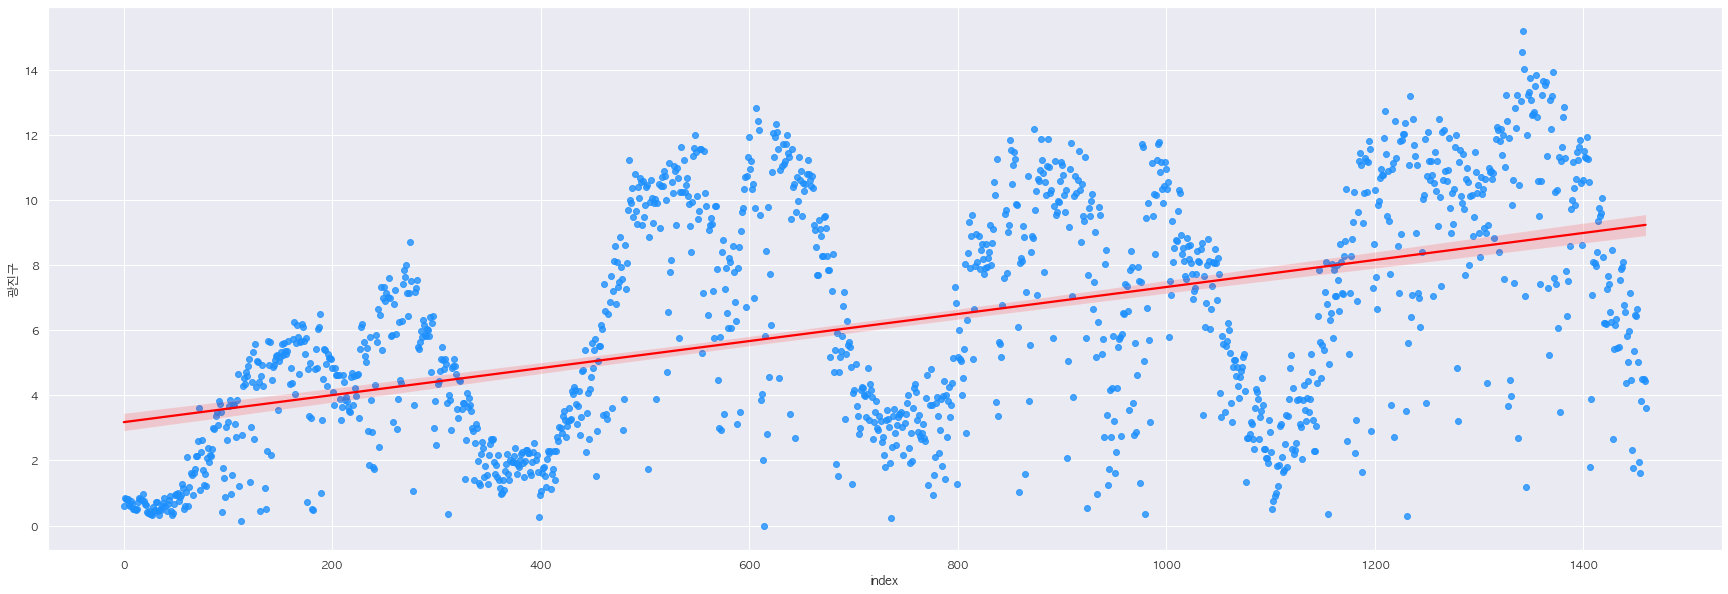

동대문구


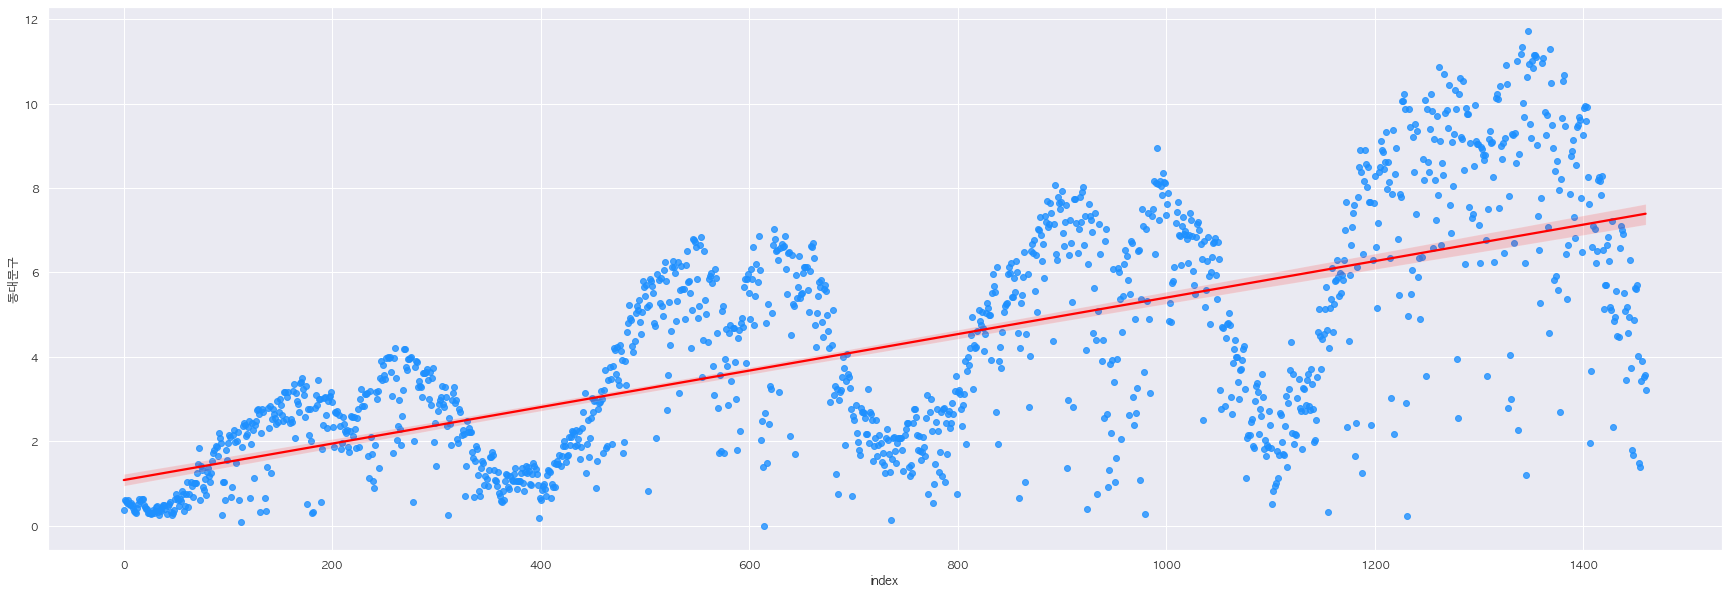

성동구


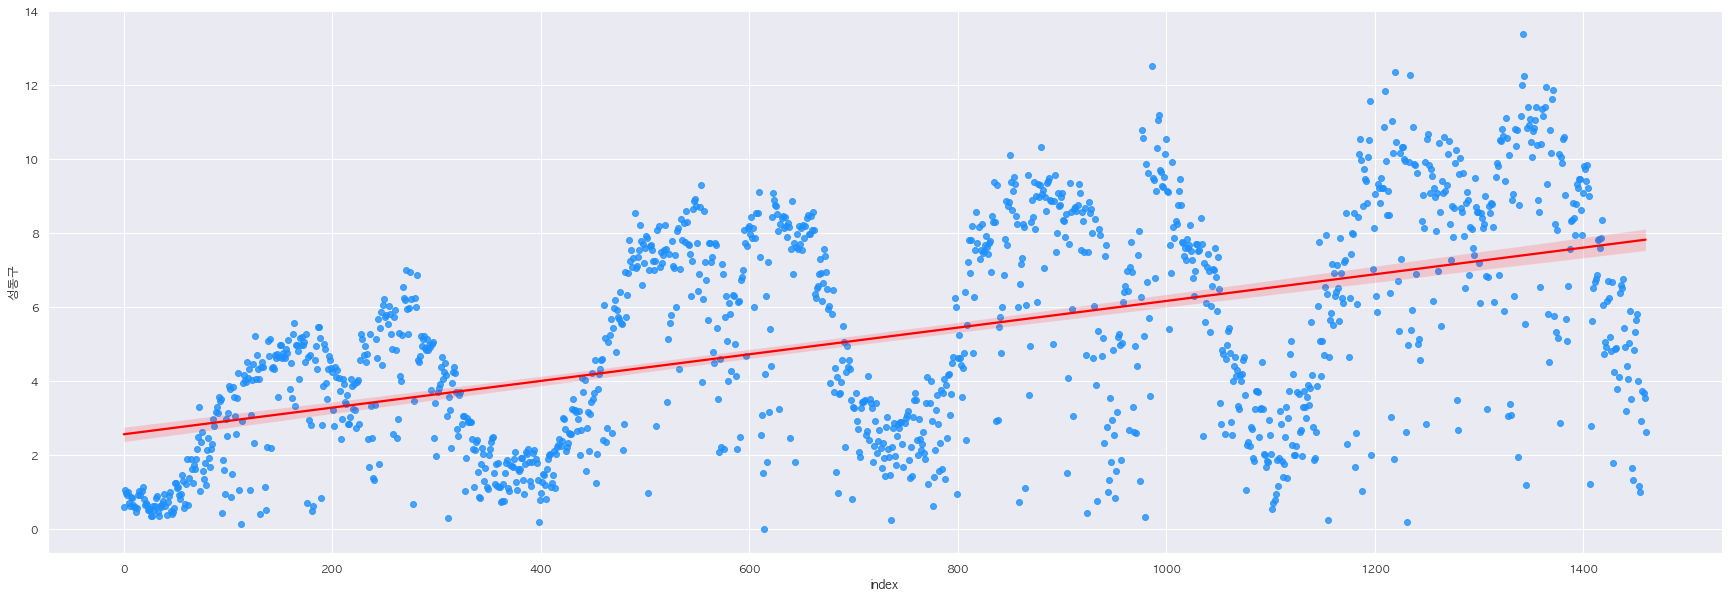

중랑구


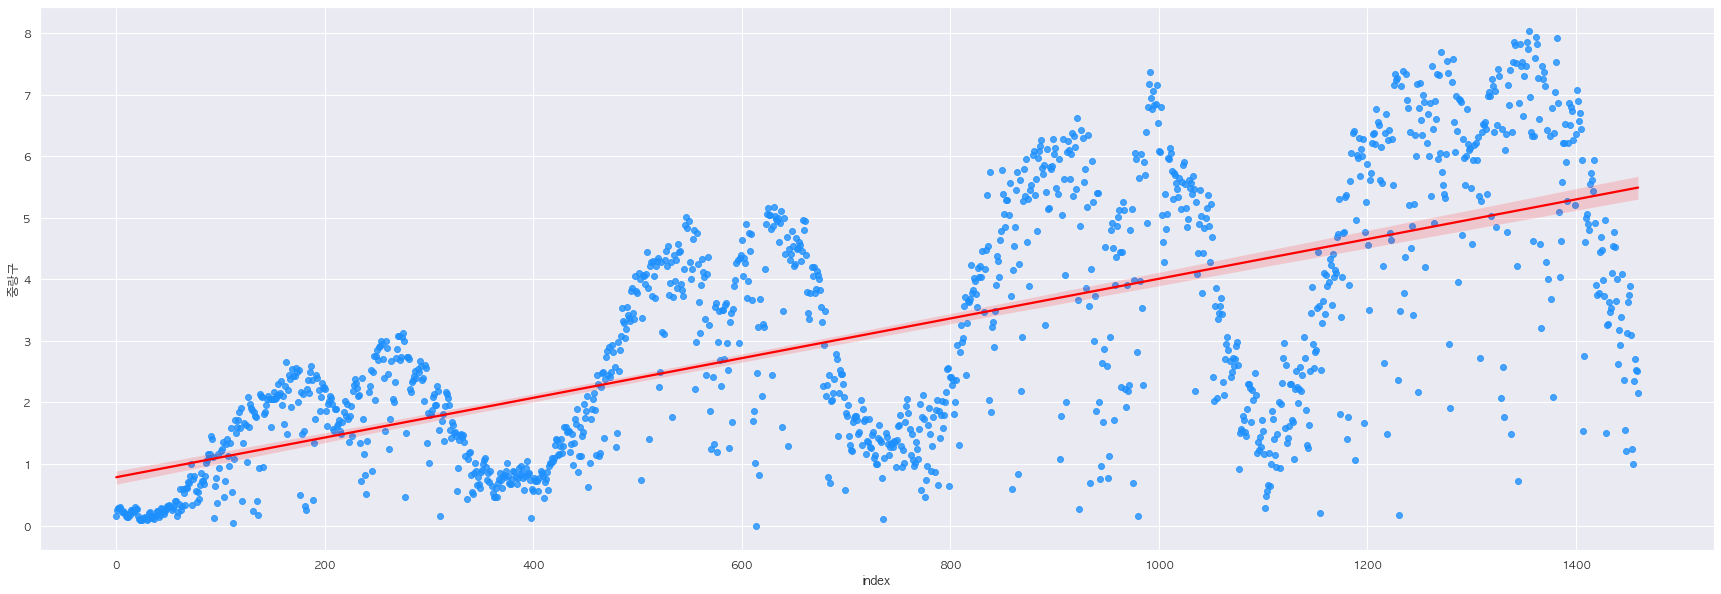

In [11]:
column = ['광진구', '동대문구', '성동구', '중랑구']

for i in column: 
    get_view_df(train, i, 1)

In [38]:
df_Temperatures = pd.read_csv('/Users/choejeehyuk/DNA/🚲UOS 빅데이터 알고리즘 경진대회/ta_20230214143052.csv',  encoding='cp949',skiprows=7)
df_Temperatures['날짜'] = df_Temperatures['날짜'].str.replace('\t', '')
df_Temperatures

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,2018-01-01,108,-1.3,-5.1,3.8
1,2018-01-02,108,-1.8,-4.3,1.8
2,2018-01-03,108,-4.7,-7.1,-0.4
3,2018-01-04,108,-4.7,-8.7,-0.7
4,2018-01-05,108,-3.0,-5.6,1.6
...,...,...,...,...,...
1456,2021-12-27,108,-7.6,-12.9,-3.9
1457,2021-12-28,108,-4.1,-8.5,-0.9
1458,2021-12-29,108,0.4,-3.8,5.9
1459,2021-12-30,108,-3.9,-6.8,0.2


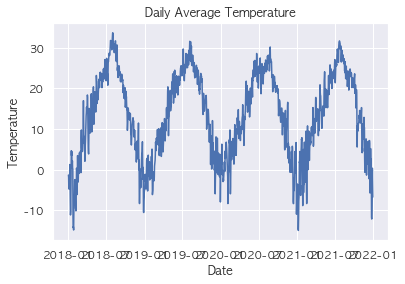

In [13]:
df_Temperatures['날짜'] = pd.to_datetime(df_Temperatures['날짜'])
df_Temperatures['연'] = df_Temperatures.날짜.dt.year
df_Temperatures['월'] = df_Temperatures.날짜.dt.month
df_Temperatures['일'] = df_Temperatures.날짜.dt.day
df_Temperatures['요일'] = df_Temperatures.날짜.dt.weekday
# train.drop(['일시'], axis=1, inplace = True)

# 그래프 그리기

plt.plot(df_Temperatures['날짜'], df_Temperatures['평균기온(℃)'])
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Daily Average Temperature')
plt.show()


In [14]:
Temperatures = df_Temperatures['평균기온(℃)']
train = pd.concat([train, Temperatures], axis=1)
train

,일시,광진구,동대문구,성동구,중랑구,year,month,day,weekday,평균기온(℃)
0,2018-01-01,0.592,0.368,0.580,0.162,2018,1,1,0,-1.3
1,2018-01-02,0.840,0.614,1.034,0.260,2018,1,2,1,-1.8
2,2018-01-03,0.828,0.576,0.952,0.288,2018,1,3,2,-4.7
3,2018-01-04,0.792,0.542,0.914,0.292,2018,1,4,3,-4.7
4,2018-01-05,0.818,0.602,0.994,0.308,2018,1,5,4,-3.0
...,...,...,...,...,...,...,...,...,...,...
1456,2021-12-27,3.830,3.416,2.908,2.350,2021,12,27,0,-7.6
1457,2021-12-28,4.510,3.890,3.714,2.700,2021,12,28,1,-4.1
1458,2021-12-29,4.490,3.524,3.660,2.524,2021,12,29,2,0.4
1459,2021-12-30,4.444,3.574,3.530,2.506,2021,12,30,3,-3.9


In [15]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
 
from scipy.stats import norm
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima.model import ARIMA


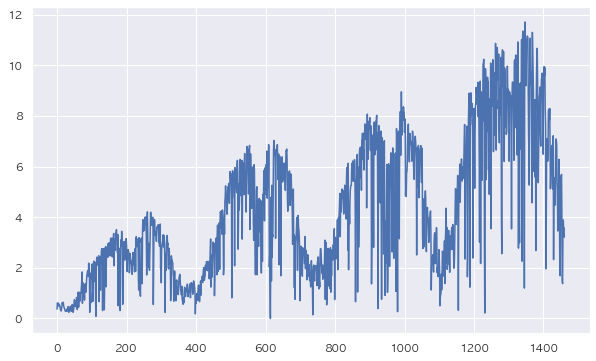

In [16]:
data = train['동대문구']
fig = plt.figure(figsize=(10,6))
fig.set_facecolor('white')
plt.plot(range(len(data)), data)
plt.show()

In [17]:
def esacf(data, ar_max=7, ma_max = 13, alpha=0.05, symbol=True):
    sig = norm.ppf(1-alpha/2)
    def lag_function(data, lag=1):
        res = [np.nan]*lag + list(data[:-lag])
        res = np.array(res)
        return res
 
    def ar_ols(data, ar_order):
        depedent_data = np.array(data[ar_order:])
        X = np.empty((0,ar_order))
        for i in range(ar_order,len(data)):
            temp_row = data[i-ar_order:i][::-1]
            X = np.vstack([X, temp_row])
 
        model = sm.OLS(depedent_data,X)
        results = model.fit()
        return results.params
 
    def reupm(mat, ncol):
        k = ncol-1
        nrow = mat.shape[0]
        # mat2[:] = np.nan
        for i in range(k):
            i1 = i+1
            work = lag_function(mat[:,i])
            work[0] = -1
            temp = mat[:,i1] - (mat[i1,i1]/mat[i,i])*work
            temp[i1] = 0
            if i ==0:
                mat2 = np.expand_dims(temp, axis=1)
            else:
                mat2 = np.column_stack((mat2, temp))
        return mat2
 
    ar_max += 1
    ma_max += 1
    nar = ar_max-1
    nma = ma_max
    ncov = nar + nma + 2
    nrow = nar + nma + 1
    ncol = nrow - 1
 
    def ceascf(m, cov1, nar, ncol, count, ncov, z, zm):
        result = [0]*(nar+1)
        result[0] = cov1[ncov+count]
        for i in range(nar):
            temp = np.column_stack((z[i+1:], zm[i+1:,:i+1])).dot([1]+list(-mat2[:i+1, i]))
            result[i+1] = acf(temp, nlags=count+1, fft=False)[count+1]
        return result
    
    z = data-np.mean(data)
    for i in range(nar):
        if i == 0:
            zm = np.expand_dims(lag_function(z,i+1), axis=1)
        else:
            zm = np.column_stack((zm,lag_function(z,i+1)))
 
    cov1 = acf(z, nlags=ncov, fft=False)
    cov1 = np.array(list(cov1[1:][::-1]) + list(cov1))
    ncov += 1
    mat = np.zeros((nrow,ncol))
    for i in range(ncol):
        mat[:i+1,i] = ar_ols(z, ar_order=i+1)
 
    for i in range(nma):
        mat2 = reupm(mat, ncol)
        ncol = ncol - 1
        if i == 0:
            eacfm = np.expand_dims(ceascf(mat2, cov1, nar, ncol, i, ncov, z, zm),axis=1)
        else:
            eacfm = np.column_stack((eacfm,ceascf(mat2, cov1, nar, ncol, i, ncov, z, zm)))
        mat = mat2
    
    if symbol:
        work = len(z) - np.array(range(1, nar+2))+1
        for j in range(nma):
            work = work - 1
            temp = np.abs(eacfm[:,j]) > sig/np.sqrt(work)
            temp = np.array(['X' if t else 'O' for t in temp])
            if j == 0:
                symbol = np.expand_dims(temp, axis=1)
            else:
                symbol = np.column_stack((symbol, temp))
        return pd.DataFrame(symbol)
    else:
        return pd.DataFrame(eacfm)

In [18]:
esacf(data, ar_max=5, ma_max = 8, alpha=0.01, symbol=True)

,0,1,2,3,4,5,6,7,8
0,X,X,X,X,X,X,X,X,X
1,X,X,O,O,O,O,X,X,O
2,X,X,X,O,O,O,X,X,O
3,X,X,X,O,O,O,X,X,O
4,X,X,X,O,O,O,X,X,O
5,X,X,X,O,O,X,X,X,X


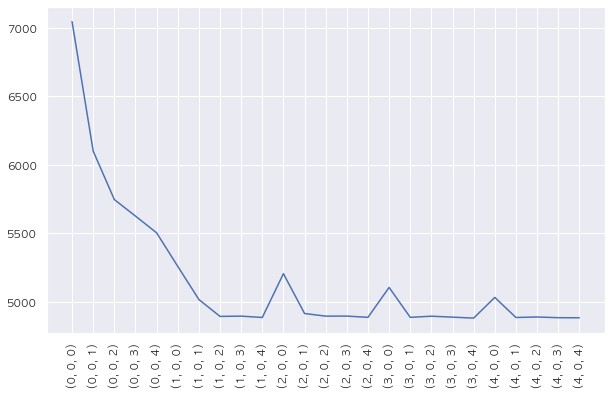

In [19]:
ar_max = 4
ma_max = 4
aic_val = []
order_list = []
for ar in range(ar_max+1):
    for ma in range(ma_max+1):
        order = (ar, 0, ma)
        order_list.append(str(order))
        model = ARIMA(data, order=order).fit()
        aic_val.append(model.aic)
 
fig = plt.figure(figsize=(10,6))
fig.set_facecolor('white')
plt.plot(range(len(aic_val)), aic_val)
plt.xticks(range(len(aic_val)), order_list, rotation=90)
plt.show()

In [20]:
order_aic = dict(zip(order_list, aic_val))
final_order, final_aic = sorted(order_aic.items(), key=lambda x:x[1])[0]
print(f'Order : {final_order}, AIC : {final_aic}')

Order : (3, 0, 4), AIC : 4880.14404691671


In [21]:
final_model = ARIMA(data, order=(3,0,4)).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   동대문구   No. Observations:                 1461
Model:                 ARIMA(3, 0, 4)   Log Likelihood               -2431.072
Date:                Tue, 14 Feb 2023   AIC                           4880.144
Time:                        16:13:18   BIC                           4927.726
Sample:                             0   HQIC                          4897.893
                               - 1461                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4540      1.731      1.996      0.046       0.062       6.846
ar.L1          0.3542      0.066      5.404      0.000       0.226       0.483
ar.L2         -0.1593      0.060     -2.670      0.008      -0.276      -0.042
ar.L3          0.7957      0.059     13.545      0.000       0.681       0.911
ma.L1          0.1009      0.070      1.447      0.148      -0.036       0.238
ma.L2          0.1460      0.050      2.913      0.004       0.048       0.244
ma.L3         -0.6635      0.045    -14.863      0.000      -0.751      -0.576
ma.L4         -0.1693      0.034     -5.036      0.000      -0.235      -0.103
sigma2         1.6298      0.042     38.878      0.000       1.548       1.712
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1689.26
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               8.42   Skew:                            -1.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

ValueError: x and y must have same first dimension, but have shapes (500,) and (2,)

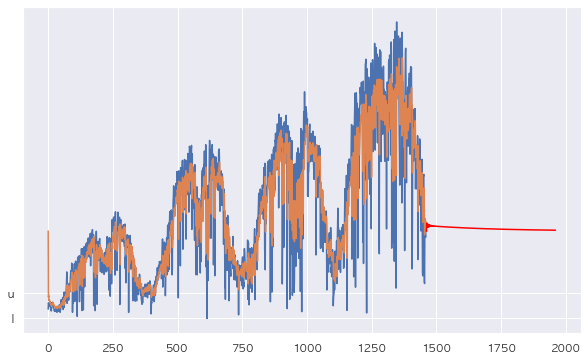

In [22]:
fig = plt.figure(figsize=(10,6))
fig.set_facecolor('white')
 
fitted_values = final_model.fittedvalues ## in-sample prediction
 
## prediction
k = 500
 
forecast = final_model.get_forecast(k) ## out-of-sample prediction
predicted_values = forecast.predicted_mean
prediction_intervals = forecast.conf_int(alpha=0.5)
upper_limit = [x[1] for x in prediction_intervals]
lower_limit = [x[0] for x in prediction_intervals]
 
pred_x = range(len(data)+1, len(data)+k+1)
 
plt.plot(range(len(data)), data, label = 'data')
plt.plot(range(len(data)), fitted_values, label='fitted')
plt.plot(pred_x,predicted_values,color='red',label='prediction')
plt.plot(pred_x,lower_limit,color='red',linestyle='--',linewidth=1)
plt.plot(pred_x,upper_limit,color='red',linestyle='--',linewidth=1)
plt.fill_between(pred_x,lower_limit,upper_limit,color='red',alpha=0.2)
plt.legend()
 
plt.show()

In [23]:
def acf(series, k):
    mean = series.mean()
    denominator = np.sum(np.square(series-mean))
    numerator = np.sum((series-mean)*(series.shift(k)-mean))
    acf_val = numerator/denominator
    return acf_val

def pacf(series, k):
    if k == 0:
        pacf_val = 1
    else:
        gamma_array = np.array([acf(series, k) for k in range(1,k+1)])
 
        gamma_matrix = []
        for i in range(k):
            temp = [0]*k
            temp[i:] = [acf(series, j) for j in range(k-i)]
            gamma_matrix.append(temp)
 
        gamma_matrix = np.array(gamma_matrix)
        gamma_matrix = gamma_matrix + gamma_matrix.T - np.diag(gamma_matrix.diagonal())
        pacf_val = np.linalg.inv(gamma_matrix).dot(gamma_array)[-1]
    return pacf_val

In [24]:
[acf(train['동대문구'],k) for k in range(11)]

[1.0,
 0.8399619928518008,
 0.7621794706024825,
 0.7518759644414572,
 0.7612972560811443,
 0.7628373622127245,
 0.7732136267256925,
 0.7940587852727292,
 0.7526967167777859,
 0.7345053436343774,
 0.7305245802825024]

In [25]:
[pacf(train['동대문구'],k) for k in range(11)]

[1,
 0.8399619928518008,
 0.19236086554712672,
 0.2583089739920903,
 0.22131560716313237,
 0.16282716630410166,
 0.1912100195572557,
 0.21775759386144644,
 -0.04362773290034694,
 0.057786907028269496,
 0.023856626585279095]

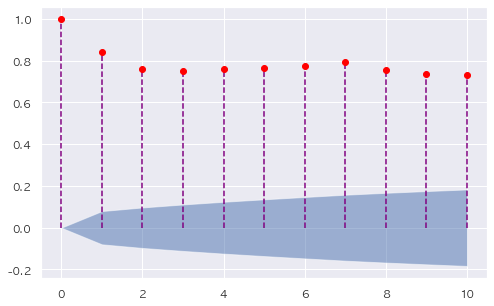

In [26]:
nlags = 10
acfs = [acf(train['동대문구'],k) for k in range(nlags+1)]
x = range(nlags+1)
fig = plt.figure(figsize=(8,5))
fig.set_facecolor('white')
 
## correlogram
markers, stemlines, baseline = plt.stem(x, acfs, use_line_collection=True)
markers.set_color('red')
stemlines.set_linestyle('--')
stemlines.set_color('purple')
baseline.set_visible(False) ## base line 안보이게
 
n = len(df)
upper_limit = []
lower_limit = []
for k in x:
    if k == 0:
        upper_limit.append(0)
        lower_limit.append(0)
    else:
        term1 = np.sqrt((1+2*np.sum(np.square(acfs[1:k+1])))/n)
        upper_limit.append(1.96*term1)
        lower_limit.append(-1.96*term1)
 
plt.fill_between(x, lower_limit, upper_limit, alpha=0.5)
plt.show()

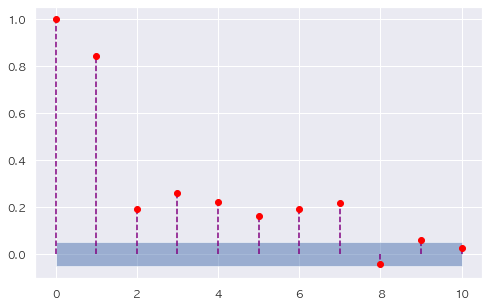

In [27]:
nlags = 10
pacfs = [pacf(train['동대문구'],k) for k in range(nlags+1)]
x = range(nlags+1)
fig = plt.figure(figsize=(8,5))
fig.set_facecolor('white')
 
## correlogram
markers, stemlines, baseline = plt.stem(x, pacfs, use_line_collection=True)
markers.set_color('red')
stemlines.set_linestyle('--')
stemlines.set_color('purple')
baseline.set_visible(False) ## base line 안보이게
 
n = len(df)
upper_limit = 1.96/np.sqrt(n)
lower_limit = -1.96/np.sqrt(n)
plt.fill_between(x, lower_limit, upper_limit, alpha=0.5)
plt.show()

<AxesSubplot:title={'center':'2021'}, xlabel='일시'>

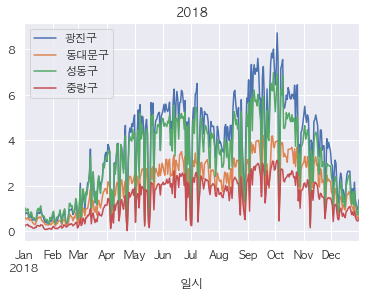

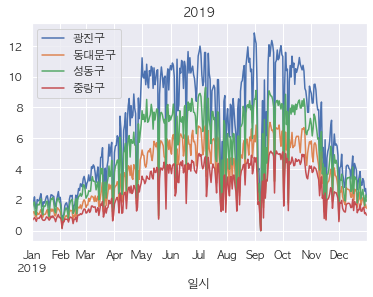

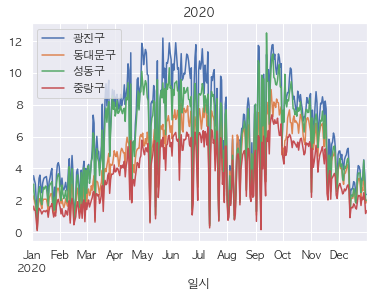

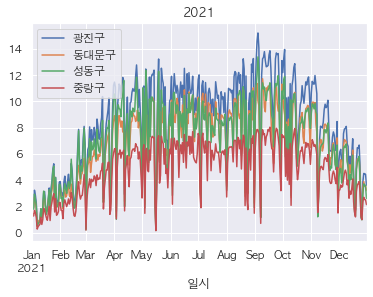

In [29]:
train.set_index('일시',inplace=True)
train.index=pd.to_datetime(train.index,format='%Y%m%d')
train['year']=train.index.year
train[train.index.year == 2018].iloc[:,:4].plot(title='2018')
train[train.index.year == 2019].iloc[:,:4].plot(title='2019')
train[train.index.year == 2020].iloc[:,:4].plot(title='2020')
train[train.index.year == 2021].iloc[:,:4].plot(title='2021')

<AxesSubplot:title={'center':'2021'}, xlabel='일시'>

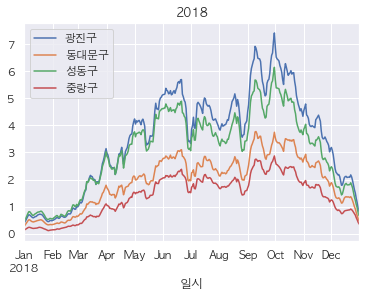

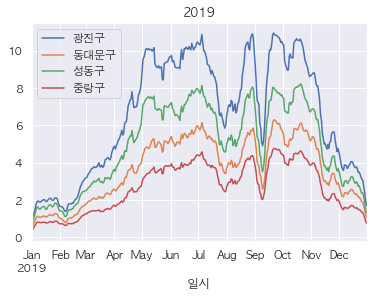

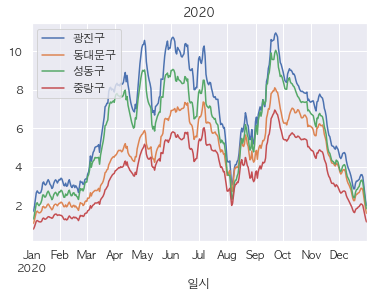

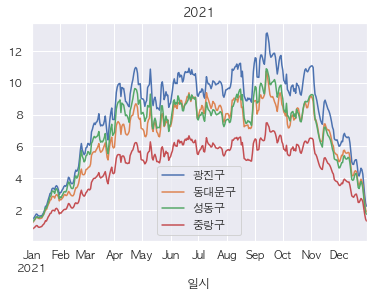

In [30]:
# smoothed_data yearly plot
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

temp_2018=train[train.index.year == 2018].iloc[:,:4]
for col in temp_2018:
    temp_2018[col] = smooth(temp_2018[col],10)
temp_2018.plot(title='2018')
temp_2019=train[train.index.year == 2019].iloc[:,:4]
for col in temp_2019:
    temp_2019[col] = smooth(temp_2019[col],10)
temp_2019.plot(title='2019')
temp_2020=train[train.index.year == 2020].iloc[:,:4]
for col in temp_2020:
    temp_2020[col] = smooth(temp_2020[col],10)
temp_2020.plot(title='2020')
temp_2021=train[train.index.year == 2021].iloc[:,:4]
for col in temp_2021:
    temp_2021[col] = smooth(temp_2021[col],10)
temp_2021.plot(title='2021')

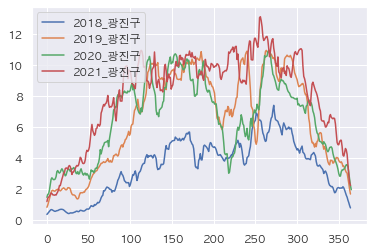

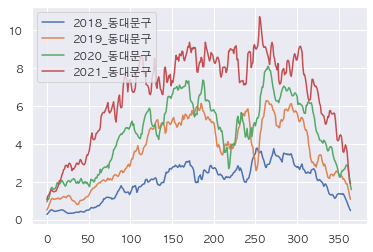

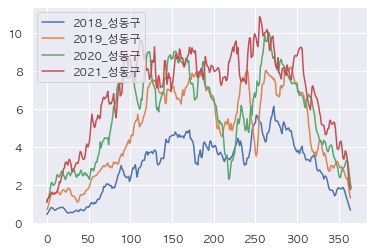

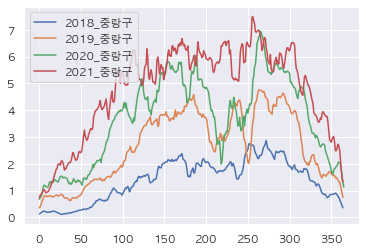

In [31]:
for i in range(4):
    temp_2018.reset_index(drop=True).iloc[:,i].plot(label=f'2018_{temp_2018.columns[i]}')
    temp_2019.reset_index(drop=True).iloc[:,i].plot(label=f'2019_{temp_2019.columns[i]}')
    temp_2020.reset_index(drop=True).iloc[:,i].plot(label=f'2020_{temp_2020.columns[i]}')
    temp_2021.reset_index(drop=True).iloc[:,i].plot(label=f'2021_{temp_2021.columns[i]}')
    plt.legend()
    plt.show()

In [39]:
df_Temperatures = pd.read_csv('/Users/choejeehyuk/DNA/🚲UOS 빅데이터 알고리즘 경진대회/ta_20230214143052.csv',  encoding='cp949',skiprows=7)
df_Temperatures['날짜'] = df_Temperatures['날짜'].str.replace('\t', '')
df_Temperatures

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,2018-01-01,108,-1.3,-5.1,3.8
1,2018-01-02,108,-1.8,-4.3,1.8
2,2018-01-03,108,-4.7,-7.1,-0.4
3,2018-01-04,108,-4.7,-8.7,-0.7
4,2018-01-05,108,-3.0,-5.6,1.6
...,...,...,...,...,...
1456,2021-12-27,108,-7.6,-12.9,-3.9
1457,2021-12-28,108,-4.1,-8.5,-0.9
1458,2021-12-29,108,0.4,-3.8,5.9
1459,2021-12-30,108,-3.9,-6.8,0.2


In [40]:
Temperatures = df_Temperatures['평균기온(℃)']
train = pd.concat([train, Temperatures], axis=1)
train

,일시,광진구,동대문구,성동구,중랑구,year,month,day,weekday,평균기온(℃)
0,2018-01-01,0.592,0.368,0.580,0.162,2018,1,1,0,-1.3
1,2018-01-02,0.840,0.614,1.034,0.260,2018,1,2,1,-1.8
2,2018-01-03,0.828,0.576,0.952,0.288,2018,1,3,2,-4.7
3,2018-01-04,0.792,0.542,0.914,0.292,2018,1,4,3,-4.7
4,2018-01-05,0.818,0.602,0.994,0.308,2018,1,5,4,-3.0
...,...,...,...,...,...,...,...,...,...,...
1456,2021-12-27,3.830,3.416,2.908,2.350,2021,12,27,0,-7.6
1457,2021-12-28,4.510,3.890,3.714,2.700,2021,12,28,1,-4.1
1458,2021-12-29,4.490,3.524,3.660,2.524,2021,12,29,2,0.4
1459,2021-12-30,4.444,3.574,3.530,2.506,2021,12,30,3,-3.9


In [43]:
df_Temperatures = pd.read_csv('/Users/choejeehyuk/DNA/🚲UOS 빅데이터 알고리즘 경진대회/평균미세먼지.csv')
df_Temperatures.head()

,측정일시,미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
0,2018-01-01,46.6,22.6
1,2018-01-02,43.8,23.2
2,2018-01-03,37.2,20.0
3,2018-01-04,49.2,26.0
4,2018-01-05,64.4,39.4


In [45]:
mm = df_Temperatures['미세먼지농도(㎍/㎥)']
mim = df_Temperatures['초미세먼지농도(㎍/㎥)']
train = pd.concat([train, mm], axis=1)
train = pd.concat([train, mim], axis=1)
train

,일시,광진구,동대문구,성동구,중랑구,year,month,day,weekday,평균기온(℃),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
0,2018-01-01,0.592,0.368,0.580,0.162,2018,1,1,0,-1.3,46.6,22.6
1,2018-01-02,0.840,0.614,1.034,0.260,2018,1,2,1,-1.8,43.8,23.2
2,2018-01-03,0.828,0.576,0.952,0.288,2018,1,3,2,-4.7,37.2,20.0
3,2018-01-04,0.792,0.542,0.914,0.292,2018,1,4,3,-4.7,49.2,26.0
4,2018-01-05,0.818,0.602,0.994,0.308,2018,1,5,4,-3.0,64.4,39.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2021-12-27,3.830,3.416,2.908,2.350,2021,12,27,0,-7.6,29.6,16.8
1457,2021-12-28,4.510,3.890,3.714,2.700,2021,12,28,1,-4.1,49.4,35.4
1458,2021-12-29,4.490,3.524,3.660,2.524,2021,12,29,2,0.4,62.0,44.8
1459,2021-12-30,4.444,3.574,3.530,2.506,2021,12,30,3,-3.9,28.2,14.6


In [63]:
df3= pd.read_csv('/Users/choejeehyuk/DNA/🚲UOS 빅데이터 알고리즘 경진대회/2018 - 2021 강수량자료.csv', encoding = 'cp949')

df3.drop(df3.index[0:7], inplace = True)
df3 = df3.reset_index(drop=True); df3

df3 = df3['Unnamed: 2']
df3

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1456      0
1457    NaN
1458    0.2
1459      0
1460    NaN
Name: Unnamed: 2, Length: 1461, dtype: object

In [64]:
train = pd.concat([train, df3], axis=1)
train

,일시,광진구,동대문구,성동구,중랑구,year,month,day,weekday,평균기온(℃),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥),Unnamed: 2
0,2018-01-01,0.592,0.368,0.580,0.162,2018,1,1,0,-1.3,46.6,22.6,NaN
1,2018-01-02,0.840,0.614,1.034,0.260,2018,1,2,1,-1.8,43.8,23.2,NaN
2,2018-01-03,0.828,0.576,0.952,0.288,2018,1,3,2,-4.7,37.2,20.0,NaN
3,2018-01-04,0.792,0.542,0.914,0.292,2018,1,4,3,-4.7,49.2,26.0,NaN
4,2018-01-05,0.818,0.602,0.994,0.308,2018,1,5,4,-3.0,64.4,39.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2021-12-27,3.830,3.416,2.908,2.350,2021,12,27,0,-7.6,29.6,16.8,0
1457,2021-12-28,4.510,3.890,3.714,2.700,2021,12,28,1,-4.1,49.4,35.4,NaN
1458,2021-12-29,4.490,3.524,3.660,2.524,2021,12,29,2,0.4,62.0,44.8,0.2
1459,2021-12-30,4.444,3.574,3.530,2.506,2021,12,30,3,-3.9,28.2,14.6,0


In [66]:
# train = train.rename(columns={'Unnamed: 2': '강수량 mm'})

# 변경된 칼럼명 확인
print(train.columns)


Index(['일시', '광진구', '동대문구', '성동구', '중랑구', 'year', 'month', 'day', 'weekday',
       '평균기온(℃)', '미세먼지농도(㎍/㎥)', '초미세먼지농도(㎍/㎥)', '강수량 mm'],
      dtype='object')


In [67]:
train['강수량 mm'] = train['강수량 mm'].fillna(0)
train

,일시,광진구,동대문구,성동구,중랑구,year,month,day,weekday,평균기온(℃),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥),강수량 mm
0,2018-01-01,0.592,0.368,0.580,0.162,2018,1,1,0,-1.3,46.6,22.6,0
1,2018-01-02,0.840,0.614,1.034,0.260,2018,1,2,1,-1.8,43.8,23.2,0
2,2018-01-03,0.828,0.576,0.952,0.288,2018,1,3,2,-4.7,37.2,20.0,0
3,2018-01-04,0.792,0.542,0.914,0.292,2018,1,4,3,-4.7,49.2,26.0,0
4,2018-01-05,0.818,0.602,0.994,0.308,2018,1,5,4,-3.0,64.4,39.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2021-12-27,3.830,3.416,2.908,2.350,2021,12,27,0,-7.6,29.6,16.8,0
1457,2021-12-28,4.510,3.890,3.714,2.700,2021,12,28,1,-4.1,49.4,35.4,0
1458,2021-12-29,4.490,3.524,3.660,2.524,2021,12,29,2,0.4,62.0,44.8,0.2
1459,2021-12-30,4.444,3.574,3.530,2.506,2021,12,30,3,-3.9,28.2,14.6,0


In [68]:
train.to_csv("최종 데이터프레임 기온 + 강수량 + 미세먼지 + 초미세먼지 + 연\월\일\요일.csv", index=True)


In [71]:
df_Final= pd.read_csv('/Users/choejeehyuk/DNA/🚲UOS 빅데이터 알고리즘 경진대회/최종 데이터프레임 기온 + 강수량 + 미세먼지 + 초미세먼지 + 연\월\일\요일.csv')
df_Final

,Unnamed: 0,일시,광진구,동대문구,성동구,중랑구,year,month,day,weekday,평균기온(℃),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥),강수량 mm
0,0,2018-01-01,0.592,0.368,0.580,0.162,2018,1,1,0,-1.3,46.6,22.6,0.0
1,1,2018-01-02,0.840,0.614,1.034,0.260,2018,1,2,1,-1.8,43.8,23.2,0.0
2,2,2018-01-03,0.828,0.576,0.952,0.288,2018,1,3,2,-4.7,37.2,20.0,0.0
3,3,2018-01-04,0.792,0.542,0.914,0.292,2018,1,4,3,-4.7,49.2,26.0,0.0
4,4,2018-01-05,0.818,0.602,0.994,0.308,2018,1,5,4,-3.0,64.4,39.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,1456,2021-12-27,3.830,3.416,2.908,2.350,2021,12,27,0,-7.6,29.6,16.8,0.0
1457,1457,2021-12-28,4.510,3.890,3.714,2.700,2021,12,28,1,-4.1,49.4,35.4,0.0
1458,1458,2021-12-29,4.490,3.524,3.660,2.524,2021,12,29,2,0.4,62.0,44.8,0.2
1459,1459,2021-12-30,4.444,3.574,3.530,2.506,2021,12,30,3,-3.9,28.2,14.6,0.0
